In [2]:
import sys, os
sys.path.append(os.path.abspath('..'))

import jax.numpy as np
from rebel import rebel

/home/timk/.local/lib/python3.10/site-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.3 is installed, but it is not compatible with the installed jaxlib version 0.6.2, so it will not be used.
  warnings.warn(


General use

(3, 650)
calculating derivative with splines
Set up rhs-library
norms 1.9989935 1299.3458
norms 1.9989935 1299.3458
working with L2 error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:04<00:00,  3.11trial/s, best loss: -426.2319270318794]
->Best value observed at:
lambda0= 0.07210841015843475 , 
lambda1= 0.22641668847151955 , 
lambda2= 0.37146742791408655 , 
alpha =  0.9999927207791115
(3, 650) (10, 3) (10, 650)
->number of parameters: p= 17
->saving parameters and estimated attractor
-0.73*x_0**2 - 0.177*x_0*x_1 + 0.328*x_0*x_2 - 4.536*x_0 + 3.186*x_1**2 + 0.209*x_1*x_2 + 0.541*x_1 + 4.323*x_2**2 + 0.21*x_2 - 7.679
-2.346*x_0*x_2 - 0.336*x_0 - 14.612*x_2 - 0.273
-0.762*x_0*x_2 + 12.302*x_1 + 0.616*x_2
rms_ls: 1.2879013543515951
rms_int: 0.21919732
rms_wasserstein: 0.00033744582
Optimization optimum: {'alpha': 0.9999927207791115, 'l0': 0.07210841015843475, 'l1': 0.22641668847151955, 'l2': 0.37146742791408655}
Losses during optim

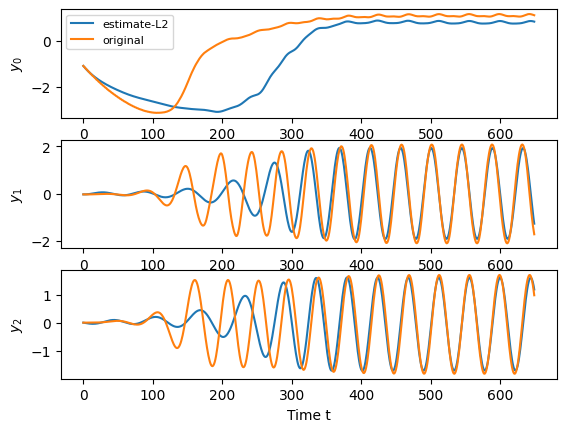

In [2]:
data = np.load("../data/cylin3dpod.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="L2", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()

Use of different metrics:

Wasserstein

(3, 650)
calculating derivative with splines
Set up rhs-library
norms 1.9989935 1299.3458
norms 1.9989935 1299.3458
working with W error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:11<00:00,  2.79trial/s, best loss: -396.99828358903324]
->Best value observed at:
lambda0= 0.001254548672984792 , 
lambda1= 0.01204857595357717 , 
lambda2= 0.24959304926762532 , 
alpha =  3.3731764435362014e-06
(3, 650) (10, 3) (10, 650)
->number of parameters: p= 24
->saving parameters and estimated attractor
-0.73*x_0**2 - 0.177*x_0*x_1 + 0.328*x_0*x_2 - 4.536*x_0 + 3.186*x_1**2 + 0.209*x_1*x_2 + 0.541*x_1 + 4.323*x_2**2 + 0.21*x_2 - 7.679
-0.177*x_0**2 - 0.226*x_0*x_1 - 2.3*x_0*x_2 - 1.003*x_0 + 0.381*x_1**2 - 0.089*x_1*x_2 + 0.376*x_1 + 0.463*x_2**2 - 14.6*x_2 - 0.972
-0.342*x_0*x_1 - 0.79*x_0*x_2 + 12.577*x_1 + 0.641*x_2
rms_ls: 1.2125433836076935
rms_int: 0.21383296
rms_wasserstein: 0.00032919293
Optimization optimum: {'alpha': 3.3731764435362

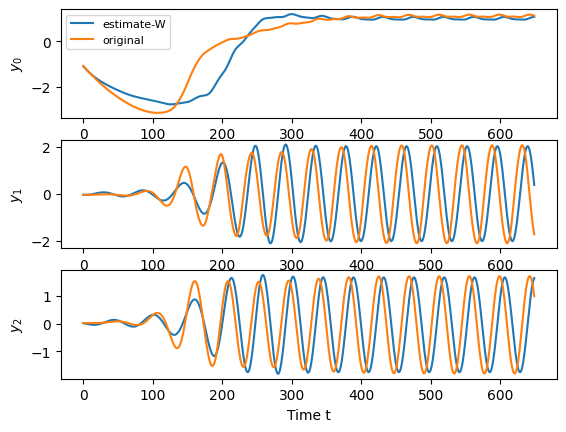

In [4]:
data = np.load("../data/cylin3dpod.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="W", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()

Mixed norm

(3, 650)
calculating derivative with splines
Set up rhs-library
norms 1.9989935 1299.3458
norms 1.9989935 1299.3458
working with mixed error
searching for optimal lambda
->working with Bayesian Information Criterion
100%|██████████| 200/200 [01:06<00:00,  2.99trial/s, best loss: -541.6795989648426]
->Best value observed at:
lambda0= 0.4792978220423669 , 
lambda1= 0.19512949962752232 , 
lambda2= 0.24993268961678172 , 
alpha =  0.6948134179353271
(3, 650) (10, 3) (10, 650)
->number of parameters: p= 15
->saving parameters and estimated attractor
-0.665*x_0**2 - 4.08*x_0 + 2.868*x_1**2 + 3.871*x_2**2 - 6.836
-0.29*x_0*x_1 - 2.373*x_0*x_2 - 0.336*x_0 + 0.426*x_1 - 14.588*x_2 - 0.273
-0.342*x_0*x_1 - 0.79*x_0*x_2 + 12.577*x_1 + 0.641*x_2
rms_ls: 1.423999953189103
rms_int: 0.18722098
rms_wasserstein: 0.00028825144
Optimization optimum: {'alpha': 0.6948134179353271, 'l0': 0.4792978220423669, 'l1': 0.19512949962752232, 'l2': 0.24993268961678172}
Losses during optimization: [163.78812091820146,

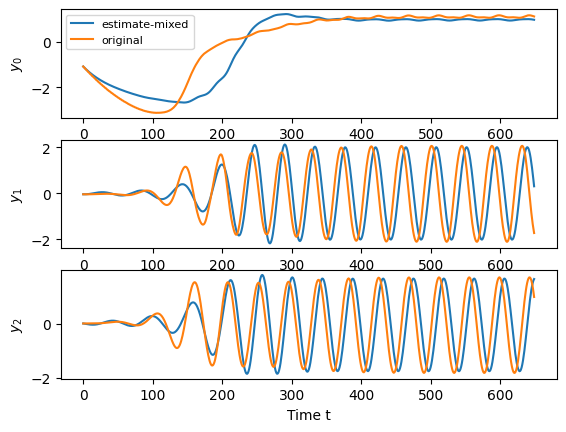

In [3]:
data = np.load("../data/cylin3dpod.npy")
print(data.shape) # data should have the shape (N_x,N_t)

# Instantiate the rebel class with the data.
# Adjust stepsize and evals if needed for faster testing.
model = rebel(data=data, stepsize=0.01, evals=200, error="mixed", order=2)

# Preprocess the data (calculate derivative and set up the library)
model.preprocess()

# (Optional) Calculate norms prior to optimization if you wish to inspect them separately.
model.calc_norms()

# Run the optimization procedure to estimate model parameters.
optimum, losses, errors = model.optimize()

# Print the optimization results.
print("Optimization optimum:", optimum)
print("Losses during optimization:", losses)
print("Errors:", errors)

# Plot the comparison of estimated vs. original trajectories.
model.plot_comparison()